# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [14]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x_n = x0
    x_n1 = np.inf
    i = 0
    while np.abs(x_n - x_n1) > eps and i < maxiter:
        i = i + 1
        x_n1 = x_n
        if fder(x_n) == 0:
            if f(x_n) == 0:
                return x_n, i
            return False
        x_n = x_n - f(x_n)/fder(x_n)
    return x_n, i

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [15]:
import numpy as np
def f(x):
    return x**2 - 1
def fder(x):
    return 2*x
x_n, i = newton_iteration(f, fder, 2, eps=1e-5, maxiter=1000)
print(x_n)#искомая точка
print(i)#кол-во итераций

1.000000000000001
5


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [32]:
def newton_iteration(f, fder, x0, m = 1, eps=1e-5, maxiter=1000):
    x_n = [x0]
    x_n1 = np.inf
    i = 0
    while i == 0 or (np.abs(x_n[-1] - x_n[-2]) > eps and i < maxiter):
        i = i + 1
        if fder(x_n[-1]) == 0:
            if f(x_n[-1]) == 0:
                return x_n, i
            return False
        x_n.append(x_n[-1] - f(x_n[-1])/fder(x_n[-1]))
    return x_n, i

x0 = 100
def f(x):
    return (x**2 - 1)**2
def fder(x):
    return 4*x*(x**2 - 1)
for m in range(1, 6):
    x_n, i = newton_iteration(f, fder, m, eps=1e-5, maxiter=1000)
    print(x)
    print(i)

[100, 75.0025, 56.25520822222593, 42.19585019963814, 31.652812402964223, 23.747507494548618, 17.82115804152844, 13.379896800208163, 10.053607348157776, 7.565072207354068, 5.706850766723964, 4.323945073021214, 3.3007763754746247, 2.5513220384272866, 2.011479942762167, 1.6328965555532882, 1.3777745829655683, 1.2147829708811564, 1.1168853056715025, 1.0615007498965112, 1.031641175599645, 1.0160632021935205, 1.0080950879113977, 1.0040637950140263, 1.0020360094045833, 1.0010190389301679, 1.0005097788108857, 1.0002549543409491, 1.0001274934167614, 1.0000637507715056, 1.0000318764017282, 1.0000159384548823, 1.0000079692909487, 1.0000039846613515, 1.000001992334645, 1.000000996168315, 1.0000004980844055, 1.0000002490422648, 1.0000001245211478, 1.0000000622605778, 1.00000003113029, 1.0000000155651452, 1.0000000077825726, 1.0000000038912864, 1.0000000019456432, 1.0000000009728216, 1.000000000486411, 1.0000000002432055, 1.0000000001216027, 1.0000000000608014]
1
[100, 75.0025, 56.25520822222593, 42

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

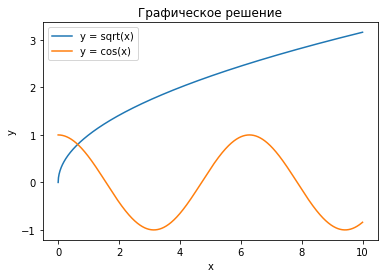

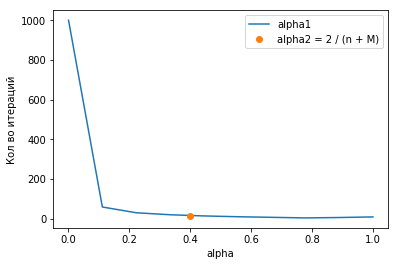

In [38]:
import numpy as np
n = 1000
x = np.linspace(0, 10, n)
import matplotlib.pyplot as plt
plt.title('Графическое решение')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, np.sqrt(x), label='y = sqrt(x)')
plt.plot(x, np.cos(x), label='y = cos(x)')
plt.legend()
plt.figure()

def fixed_point(f, x0, alpha = 1, eps=1e-5, maxiter=1000):
    x_n = [x0]
    i = 0
    while i == 0 or (np.abs(x_n[-1] - x_n[-2]) > eps and i < maxiter):
        i = i + 1
        if fder(x_n[-1]) == 0:
            if f(x_n[-1]) == 0:
                return x_n, i
            return False
        x_n.append(x_n[-1] - alpha * f(x_n[-1]))
    return x_n, i
f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1 / (2 * np.sqrt(x)) + np.sin(x)
M = np.max(np.abs(fder(x[1:])))
m = np.min(np.abs(fder(x[1:])))
alpha = np.linspace(0.001, 1, 10)
a = 2 / (m + M)
x0 = 1

I = [fixed_point(f, x0, i)[1] for i in alpha]
plt.xlabel('alpha')
plt.ylabel('Кол во итераций')
plt.plot(alpha, I, label='alpha1')
plt.plot(a, fixed_point(f, x0, a)[1], 'o', label='alpha2 = 2 / (n + M)')
plt.legend()



# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.